## Wrangling US County-Level Mortality

In [1]:
import pandas as pd

### Finding Relevant Mortality Categories
Looking at all the categories of mortality to see which one is related to maternal health. It seems like we should narrow down on **maternal disorders** and **neonatal disorders**.

In [2]:
countyMortality = pd.read_csv("mort.csv")
set(countyMortality['Category'].values)

{'Cardiovascular diseases',
 'Chronic respiratory diseases',
 'Cirrhosis and other chronic liver diseases',
 'Diabetes, urogenital, blood, and endocrine diseases',
 'Diarrhea, lower respiratory, and other common infectious diseases',
 'Digestive diseases',
 'Forces of nature, war, and legal intervention',
 'HIV/AIDS and tuberculosis',
 'Maternal disorders',
 'Mental and substance use disorders',
 'Musculoskeletal disorders',
 'Neglected tropical diseases and malaria',
 'Neonatal disorders',
 'Neoplasms',
 'Neurological disorders',
 'Nutritional deficiencies',
 'Other communicable, maternal, neonatal, and nutritional diseases',
 'Other non-communicable diseases',
 'Self-harm and interpersonal violence',
 'Transport injuries',
 'Unintentional injuries'}

### Create a More Specific Dataset
Limiting observations to those in North Carolina for maternal disorders and neonatal disorders

In [70]:
countyMortality = countyMortality[countyMortality.Location.str.contains('North Carolina')]
countyMortality = countyMortality[(countyMortality.Category.str.contains('Maternal disorders')) |  (countyMortality.Category.str.contains('Neonatal disorders'))]
countyMortality

,Location,FIPS,Category,"Mortality Rate, 1980*","Mortality Rate, 1980* (Min)","Mortality Rate, 1980* (Max)","Mortality Rate, 1985*","Mortality Rate, 1985* (Min)","Mortality Rate, 1985* (Max)","Mortality Rate, 1990*",...,"Mortality Rate, 2005* (Max)","Mortality Rate, 2010*","Mortality Rate, 2010* (Min)","Mortality Rate, 2010* (Max)","Mortality Rate, 2014*","Mortality Rate, 2014* (Min)","Mortality Rate, 2014* (Max)","% Change in Mortality Rate, 1980-2014","% Change in Mortality Rate, 1980-2014 (Min)","% Change in Mortality Rate, 1980-2014 (Max)"
1924,North Carolina,37.0,Neonatal disorders,11.39,10.96,12.27,8.64,8.40,9.20,7.52,...,5.95,4.94,4.56,5.09,4.43,4.05,4.60,-61.12,-66.29,-58.74
1925,"Alamance County, North Carolina",37001.0,Neonatal disorders,11.42,10.18,12.73,8.69,7.87,9.64,7.78,...,6.87,5.45,4.90,5.96,5.07,4.56,5.57,-55.60,-61.58,-51.53
1926,"Alexander County, North Carolina",37003.0,Neonatal disorders,8.01,6.81,9.34,6.00,5.15,6.98,5.24,...,4.89,3.69,3.11,4.28,3.35,2.80,3.90,-58.19,-65.78,-52.66
1927,"Alleghany County, North Carolina",37005.0,Neonatal disorders,7.61,6.31,9.24,5.71,4.74,6.84,4.87,...,4.61,3.33,2.67,4.00,2.97,2.33,3.58,-61.00,-68.81,-54.45
1928,"Anson County, North Carolina",37007.0,Neonatal disorders,15.05,13.17,17.17,11.48,10.10,12.94,10.20,...,9.37,7.34,6.43,8.35,6.55,5.73,7.42,-56.50,-62.07,-51.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49930,"Wayne County, North Carolina",37191.0,Maternal disorders,0.43,0.35,0.53,0.36,0.29,0.44,0.33,...,0.53,0.46,0.34,0.60,0.45,0.33,0.60,3.83,-26.31,41.63
49931,"Wilkes County, North Carolina",37193.0,Maternal disorders,0.20,0.16,0.25,0.19,0.15,0.24,0.25,...,0.39,0.32,0.22,0.42,0.32,0.22,0.44,56.33,5.68,114.34
49932,"Wilson County, North Carolina",37195.0,Maternal disorders,0.50,0.40,0.60,0.42,0.33,0.51,0.37,...,0.58,0.50,0.36,0.68,0.48,0.33,0.66,-3.31,-34.15,37.05
49933,"Yadkin County, North Carolina",37197.0,Maternal disorders,0.19,0.15,0.25,0.17,0.13,0.22,0.21,...,0.39,0.28,0.19,0.40,0.27,0.18,0.39,41.09,-10.00,103.80


### Isolating Maternal Disorders
Visualzing the % Change in Mortality Rate, 1980-2014. Green means that the percent change in mortality rate from maternal disorders from 1980 to 2014 has decreased. Red means that the percent change in mortality rate from maternal disorders from 1980 to 2014 has increased.

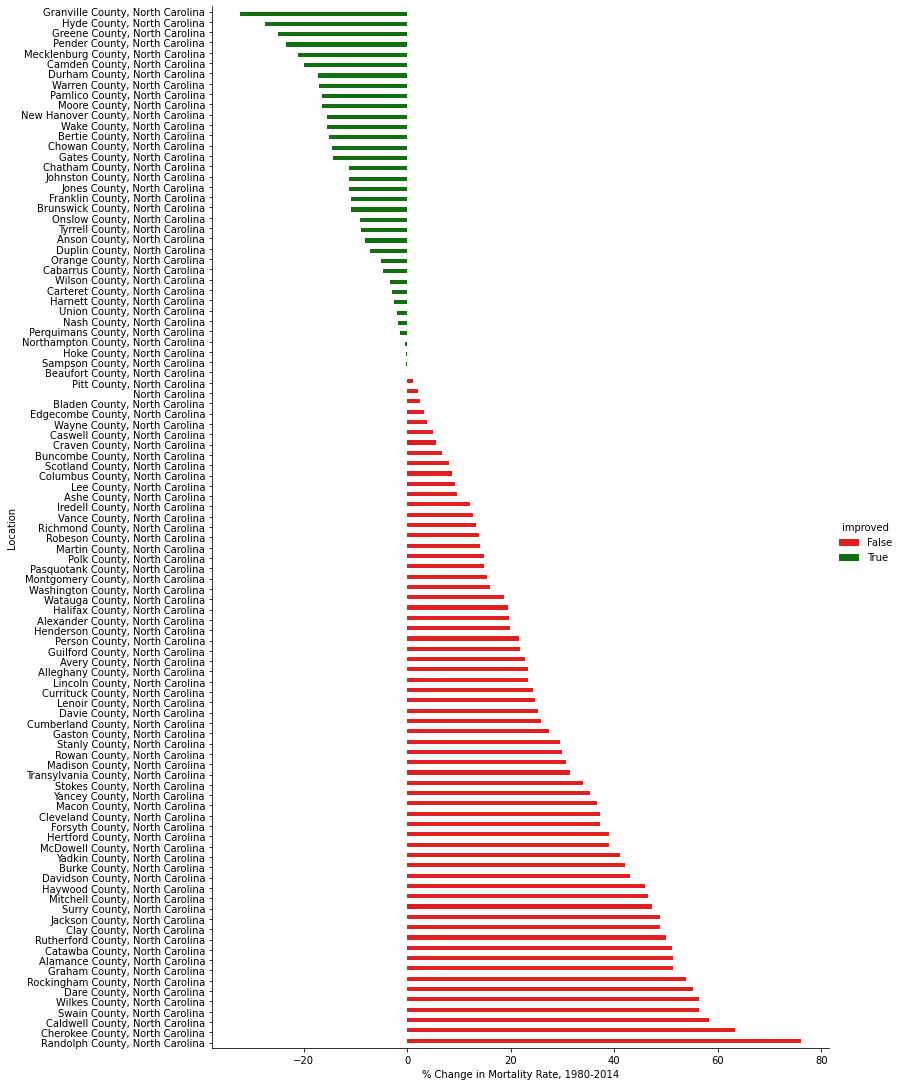

In [76]:
import seaborn as sns

maternalChange = countyMortality[countyMortality['Category'] == "Maternal disorders"]
maternalChange = maternalChange.sort_values('% Change in Mortality Rate, 1980-2014')
names = maternalChange['Location']
names = [x if x == "North Carolina" else x.split(', ')[0] for x in names]
maternalChange['improved'] = maternalChange['% Change in Mortality Rate, 1980-2014'] < 0
sns.catplot(y="Location", x = "% Change in Mortality Rate, 1980-2014",
           kind = "bar", data = maternalChange,
            color = 'grey', height=15, aspect=11.7/15, hue="improved",
           palette=sns.color_palette(['red', 'green']))